<a href="https://colab.research.google.com/github/Ishansingh438/NYC-Taxi-Trip-Time-Prediction/blob/main/Ishan_Singh_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

**First of all, we will import all the necessary libraries needed for analysis and visualization.**

In [ ]:
# Importing reqquired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()
from geopy.distance import great_circle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Let us read our data first.

In [ ]:
# Loading csv file
file_path ='/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project 2/NYC Taxi Data.csv'
taxi_df = pd.read_csv(file_path)
taxi_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


## **Exploring  the Dataset**

In [ ]:
# number of rows and columns in dataset
taxi_df.shape

(1458644, 11)

### We see the shape of the dataset is (1458644, 11) which essentially means that there are 1458644 rows and 11 columns in the dataset.


In [ ]:
# dataset columns
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# dataset information
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# first five rows of dataset
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **Independent Variables**

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in  vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

### Target variable
trip_duration - duration of the trip in seconds


In [ ]:
# if there is any null value in dataset
taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# check for unique values in dataset
taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
# statistical summary of the numerical column
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
ax = sns.countplot(x = taxi_df['passenger_count'])
plt.title('Distribution of Passenger Count')
plt.show()

NameError: ignored

In [ ]:
# converting pickup_datetime and dropoff_datetime into datetime format
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])

In [ ]:
taxi_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
# let us extract and create new features from this datetime features
taxi_df['pickup_day']=taxi_df['pickup_datetime'].dt.day_name()
taxi_df['dropoff_day']=taxi_df['dropoff_datetime'].dt.day_name()

taxi_df['pickup_day_no']=taxi_df['pickup_datetime'].dt.weekday
taxi_df['dropoff_day_no']=taxi_df['dropoff_datetime'].dt.weekday

taxi_df['pickup_hour']=taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour']=taxi_df['dropoff_datetime'].dt.hour

taxi_df['pickup_month']=taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month']=taxi_df['dropoff_datetime'].dt.month

In [ ]:
# look at the distribution of the pickup and drop off day distributions
taxi_df['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [ ]:
taxi_df['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

ValueError: ignored

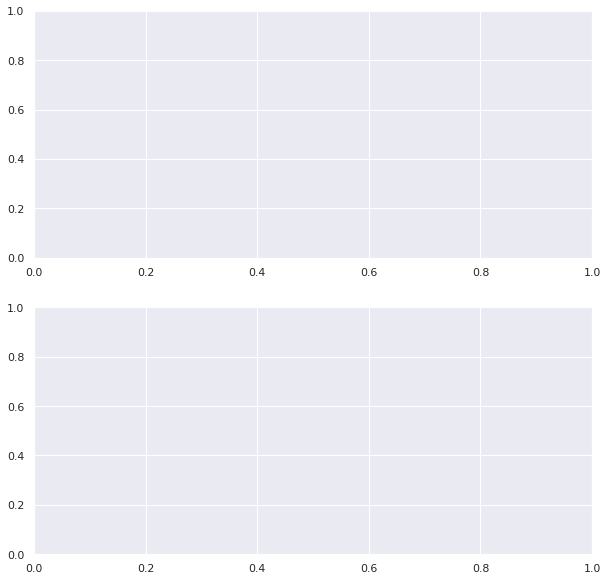

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=taxi_df,ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=taxi_df,ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

### pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

In [ ]:
# look at the distribution of the pickup and drop off day number  distributions
taxi_df['pickup_day_no'].value_counts()

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: pickup_day_no, dtype: int64

In [ ]:
# look at the distribution of the pickup and drop off hour distributions
taxi_df['pickup_hour'].value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: pickup_hour, dtype: int64

In [ ]:
taxi_df['dropoff_hour'].value_counts()

19    93431
18    89588
20    85337
21    83619
22    81568
15    73109
23    72596
14    72390
17    72020
12    71602
13    71211
9     67527
11    66821
10    66053
16    65917
8     64105
0     57811
7     49939
1     41760
2     29845
6     29234
3     22086
4     17037
5     14038
Name: dropoff_hour, dtype: int64

In [ ]:
#  look at the distribution of the pickup and drop off months distributions
taxi_df['pickup_month'].value_counts()

3    256135
4    251636
5    248555
2    238292
6    234243
1    229656
7       127
Name: dropoff_month, dtype: int64

In [ ]:
taxi_df['dropoff_month'].value_counts()

3    256135
4    251636
5    248555
2    238292
6    234243
1    229656
7       127
Name: dropoff_month, dtype: int64

All the months has uniform distribution of trips.No data is present for pickup months beyond July. There are few data present in July for drop off months. It may be outlier as well. We will have to look into that.

For the drop offs done in July we will find the frequency distribution of the corresponding pickup month. We find the corresponding date as well.

In [ ]:
print(taxi_df[taxi_df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(taxi_df[taxi_df.dropoff_month==7].pickup_datetime.dt.day.value_counts())


6    127
Name: pickup_datetime, dtype: int64
30    127
Name: pickup_datetime, dtype: int64


### I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
# let us apply this function and create new columns in the dataset.
taxi_df[‘pickup_hour’]=taxi_df[‘pickup_hour’].apply(time_of_day)
taxi_df[‘dropoff_hour’]=taxi_df[‘dropoff_hour’].apply(time_of_day)

SyntaxError: ignored